In [1]:
# Imports
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define paths to training and testing directories
train_dir = "Img/train/"
test_dir = "Img/test/"
validation_dir = "Img/validation/"

# Define img_size and batch_size
img_height = 150
img_width = 150
batch_size = 32

# Define the number of classes (a-z, A-Z)
num_classes = 52

# Data generators for training, validation, and testing with data augmentation
# Set parameters
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,  
    width_shift_range=0.1,  
    height_shift_range=0.1,  
    shear_range=0.1,  
    zoom_range=0.1,  
    horizontal_flip=False,  
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)

# Training data generator
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',  
    
    # Classes from 11-63 to exclude numbers. Uses img name
    classes=[f"img{i:03d}" for i in range(11, 63)]
)

# Validation data generator
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    classes=[f"img{i:03d}" for i in range(11, 63)]
)

# Testing data generator
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    classes=[f"img{i:03d}" for i in range(11, 63)]
)

# Define Model CNN, 9 total layers
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model woth adam
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model with validation data, using 10 Epochs for speed, 100 for accuracy
history = model.fit(train_generator, epochs=10, validation_data=validation_generator)

# Evaluate the model on the test set and print test accuracy
test_loss, test_acc = model.evaluate(test_generator)
print('Test accuracy:', test_acc)


Found 1716 images belonging to 52 classes.
Found 572 images belonging to 52 classes.
Found 572 images belonging to 52 classes.
Epoch 1/10
54/54 [==============================] - 59s 1s/step - loss: 3.9597 - accuracy: 0.0251 - val_loss: 3.8200 - val_accuracy: 0.0559
Epoch 2/10
54/54 [==============================] - 40s 740ms/step - loss: 3.4510 - accuracy: 0.1300 - val_loss: 2.6682 - val_accuracy: 0.2955
Epoch 3/10
54/54 [==============================] - 40s 749ms/step - loss: 2.6525 - accuracy: 0.3007 - val_loss: 2.1482 - val_accuracy: 0.4126
Epoch 4/10
54/54 [==============================] - 41s 760ms/step - loss: 2.0985 - accuracy: 0.4307 - val_loss: 1.8323 - val_accuracy: 0.4773
Epoch 5/10
54/54 [==============================] - 40s 750ms/step - loss: 1.7818 - accuracy: 0.5000 - val_loss: 1.7816 - val_accuracy: 0.5385
Epoch 6/10
54/54 [==============================] - 43s 799ms/step - loss: 1.5813 - accuracy: 0.5723 - val_loss: 1.5663 - val_accuracy: 0.6014
Epoch 7/10
54/54 [

In [2]:
# Mapping that helps match the classes up with a type
tag_mapping = {
    '1': 'A',
    '2': 'B',
    '3': 'C',
    '4': 'D',
    '5': 'E',
    '6': 'F',
    '7': 'G',
    '8': 'H',
    '9': 'I',
    '10': 'J',
    '11': 'K',
    '12': 'L',
    '13': 'M',
    '14': 'N',
    '15': 'O',
    '16': 'P',
    '17': 'Q',
    '18': 'R',
    '19': 'S',
    '20': 'T',
    '21': 'U',
    '22': 'V',
    '23': 'W',
    '24': 'X',
    '25': 'Y',
    '26': 'Z',
    '27': 'a',
    '28': 'b',
    '29': 'c',
    '30': 'd',
    '31': 'e',
    '32': 'f',
    '33': 'g',
    '34': 'h',
    '35': 'i',
    '36': 'j',
    '37': 'k',
    '38': 'l',
    '39': 'm',
    '40': 'n',
    '41': 'o',
    '42': 'p',
    '43': 'q',
    '44': 'r',
    '45': 's',
    '46': 't',
    '47': 'u',
    '48': 'v',
    '49': 'w',
    '50': 'x',
    '51': 'y',
    '52': 'z',
}

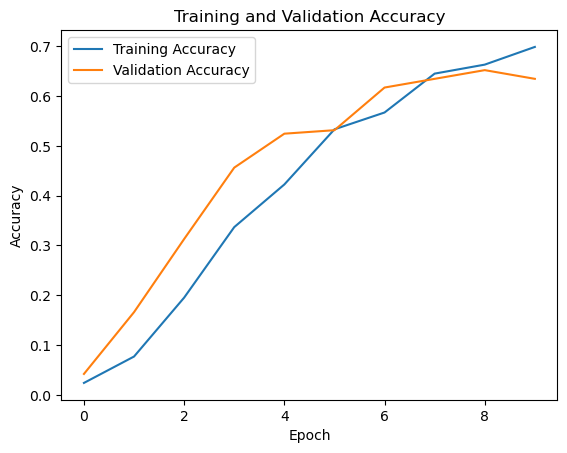

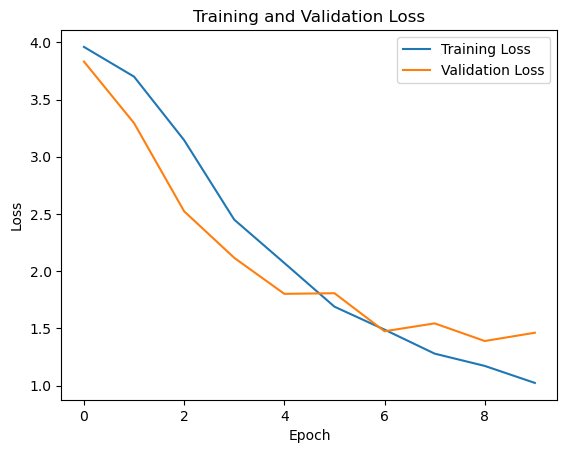

Test accuracy: 0.7622377872467041


In [12]:
# Import Matplot 
import matplotlib.pyplot as plt

# Visualize training and validation accuracy using matplolt
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Visualize training and validation loss using matplolt
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Print test accuracy
print('Test accuracy:', test_acc)


In [3]:
# Import requirment
import random
import tkinter as tk
from tkinter import Button, Canvas, HORIZONTAL, Label, RAISED, SUNKEN, Scale, messagebox
from PIL import Image, ImageDraw
import numpy as np

# Define class paint
class Paint(object):
    
    # Set defaults
    DEFAULT_PEN_SIZE = 5.0
    DEFAULT_COLOR = 'black'
    
    # Initalization function
    def __init__(self):
        # Create a window and set the text and buttons
        self.root = tk.Tk()
        
        self.draw_button = Button(self.root, text='draw', command=self.use_draw)
        self.draw_button.grid(row=0, column=0)

        self.choose_size_button = Scale(self.root, from_=20, to=25, orient=HORIZONTAL)
        self.choose_size_button.grid(row=0, column=1)

        self.clear_button = Button(self.root, text='clear', command=self.clear_canvas)
        self.clear_button.grid(row=0, column=2)

        self.export_button = Button(self.root, text='export', command=self.export_canvas)
        self.export_button.grid(row=0, column=3)

        # Generate a random letter for the instructions
        self.random_letter = random.choice(list(tag_mapping.values()))
        self.instructions_label = Label(self.root, text=f'Please draw the letter "{self.random_letter}"')
        self.instructions_label.grid(row=0, column=4)

        self.canvas_width = 600
        self.canvas_height = 600
        self.image = Image.new("RGB", (self.canvas_width, self.canvas_height), "white")
        self.draw = ImageDraw.Draw(self.image)

        self.c = Canvas(self.root, bg='white', width=self.canvas_width, height=self.canvas_height)
        self.c.grid(row=1, columnspan=5)

        self.setup()
        self.root.mainloop()
    
    # Generate a random letter to draw    
    def randomize_letter(self):
        self.random_letter = random.choice(list(tag_mapping.values()))
        self.instructions_label.config(text=f'Please draw the letter "{self.random_letter}"')
    
    # Define setup
    def setup(self):
        self.old_x = None
        self.old_y = None
        self.line_width = self.choose_size_button.get()
        self.color = self.DEFAULT_COLOR
        self.active_button = self.draw_button
        self.c.bind('<B1-Motion>', self.paint)
        self.c.bind('<ButtonRelease-1>', self.reset)
    
    # Draw function
    def use_draw(self):
        self.activate_button(self.draw_button)
    
    # Button for when is active
    def activate_button(self, some_button):
        self.active_button.config(relief=RAISED)
        some_button.config(relief=SUNKEN)
        self.active_button = some_button
    
    # Main paint function
    def paint(self, event):
        self.line_width = self.choose_size_button.get()
        paint_color = self.color
        if self.old_x and self.old_y:
            
            # Interpolate between the previous and current points
            num_steps = max(abs(event.x - self.old_x), abs(event.y - self.old_y))
            if num_steps > 0:
                x_step = (event.x - self.old_x) / num_steps
                y_step = (event.y - self.old_y) / num_steps
                for i in range(num_steps):
                    x = int(self.old_x + i * x_step)
                    y = int(self.old_y + i * y_step)
                    
                    # Draw on the canvas
                    self.c.create_line(x, y, x + x_step, y + y_step,
                                       width=self.line_width, fill=paint_color,
                                       capstyle=tk.ROUND, smooth=True, splinesteps=36)
                    
                    # Draw on the image
                    self.draw.line([x, y, x + x_step, y + y_step], fill=paint_color, width=self.line_width)
        self.old_x = event.x
        self.old_y = event.y
    
    # Reset function
    def reset(self, event):
        self.old_x, self.old_y = None, None
    
    # Clear canvas 
    def clear_canvas(self):
        self.c.delete("all")
        self.image = Image.new("RGB", (self.canvas_width, self.canvas_height), "white")
        self.draw = ImageDraw.Draw(self.image)
    
    # Export canvas to jpg
    def export_canvas(self):
        file_path = "canvas_content.jpg"
        self.image.save(file_path, dpi=(300, 300))
        predicted_digit, confidence_scores = self.identify_digit(file_path)

        # Get the predicted letter from the tag_mapping
        predicted_description = tag_mapping.get(str(predicted_digit), str(predicted_digit))
        
        # Check if the first letter of the predicted class matches the random letter
        if predicted_description[0].lower() == self.random_letter.lower():
            result = "Good"
            self.randomize_letter()
        else:
            result = "Wrong"
            self.randomize_letter()
        
        prediction_text = f"Predicted digit: {predicted_description} ({predicted_digit}) - Confidence: {confidence_scores[predicted_digit - 1]:.2%}\n\n"
        combined_text = f"Result: {result}\n\n{prediction_text}"

        messagebox.showinfo("Prediction Result", combined_text)
    
    # ID drawn character
    def identify_digit(self, image_path):
        input_image = Image.open(image_path)
        input_image = input_image.resize((img_width, img_height))
        input_image = np.array(input_image) / 255.0
        input_image = np.expand_dims(input_image, axis=0)

        # Make predictions using the trained model
        predicted_probabilities = model.predict(input_image)
        predicted_digit = np.argmax(predicted_probabilities)
        confidence_scores = predicted_probabilities[0]
        
        # +1 to align prediction as it preds 1, 63 not 0-62
        predicted_digit = predicted_digit + 1
        
        # Return the score and digit
        return predicted_digit, confidence_scores

# Main function to run program
if __name__ == '__main__':
    Paint()


1/1 [==============================] - 0s 21ms/step
